In [0]:

from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sortedcontainers import SortedList

from datetime import datetime

from google.colab import drive
drive.mount('/content/drive/')


	



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
def get_data(limit=None):
  print("Reading in and transforming data...")
  df = pd.read_csv('/content/drive/My Drive/Datasets/KNN/train.csv/train.csv')
  data = df.values
  np.random.shuffle(data)
  X = data[:, 1:] / 255.0 # data is from 0..255
  Y = data[:, 0]
  if limit is not None:
    X, Y = X[:limit], Y[:limit]
  return X, Y

In [0]:
class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j,xt in enumerate(self.X): # training points
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            # print "input:", x
            # print "sl:", sl

            # vote
            votes = {}
            for _, v in sl:
                # print "v:", v
                votes[v] = votes.get(v,0) + 1
            # print "votes:", votes, "true:", Ytest[i]
            max_votes = 0
            max_votes_class = -1
            for v,count in iteritems(votes):
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

In [0]:
X,Y=get_data(2000)
Ntrain=1000
Xtrain,Ytrain=X[:Ntrain],Y[:Ntrain]
Xtest,Ytest=X[Ntrain:],Y[Ntrain:]



Reading in and transforming data...


In [0]:
print(Xtrain.shape)
print('\n\n\n',Ytrain.shape
      )

(1000, 784)



 (1000,)


In [0]:
for k in (1,2,3,4,5):
  knn=KNN(k)
  t0=datetime.now()
  knn.fit(Xtest,Ytrain)
  print("Training time: ",(datetime.now()-t0))

  t0=datetime.now()
  print ("Train accuracy: ",knn.score(Xtrain,Ytrain))
  print ("Time to compute train accuracy",(datetime.now()-t0),"train size:",len(Ytrain))

  t0=datetime.now()
  print ("Test accuracy: ",knn.score(Xtest,Ytest))
  print ("Time to compute test accuracy",(datetime.now()-t0),"test size:",len(Ytest))


Training time:  0:00:00.000008
Train accuracy:  0.107
Time to compute train accuracy 0:00:05.511597 train size: 1000
Test accuracy:  0.09
Time to compute test accuracy 0:00:05.443585 test size: 1000
Training time:  0:00:00.000006
Train accuracy:  0.107
Time to compute train accuracy 0:00:05.484476 train size: 1000
Test accuracy:  0.09
Time to compute test accuracy 0:00:05.443190 test size: 1000
Training time:  0:00:00.000008
Train accuracy:  0.102
Time to compute train accuracy 0:00:05.498972 train size: 1000
Test accuracy:  0.087
Time to compute test accuracy 0:00:05.484384 test size: 1000
Training time:  0:00:00.000008
Train accuracy:  0.101
Time to compute train accuracy 0:00:05.486264 train size: 1000
Test accuracy:  0.091
Time to compute test accuracy 0:00:05.492755 test size: 1000
Training time:  0:00:00.000005
Train accuracy:  0.105
Time to compute train accuracy 0:00:05.466322 train size: 1000
Test accuracy:  0.086
Time to compute test accuracy 0:00:05.439304 test size: 1000


How can KNN fail?

In [0]:
def getData():
  width=8
  height=8
  N=width*height
  X=np.zeros((N,2))
  Y=np.zeros(N)
  n=0
  start_t=0
  for i in range(width):
    t=start_t
    for j in range(height):
      X[n]=[i,j]
      Y[n]=t
      n+=1
      t=(t+1)%2
    start_t=(start_t+1)%2
  return X,Y

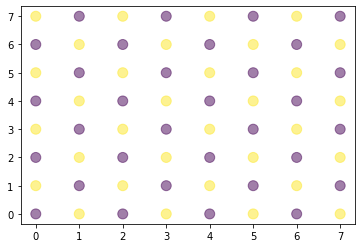

In [0]:
X,Y=getData()
plt.scatter(X[:,0],X[:,1],s=100,c=Y,alpha=0.5)
plt.show()

In [0]:
model=KNN(3)
model.fit(X,Y)
print("train accuracy: ",model.score(X,Y))

train accuracy:  0.0
